In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Visualización de la información - Tarea 12

Elaborada por: __Andrés Urbano Guillermo Gerardo__

Leemos nuestro conjunto de datos:

In [2]:
df = pd.read_csv('AirPassengers.csv')
df.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


Indexamos el indice con el mes para realizar nuestra serie de tiempo.

In [3]:
# Convertimos el Month como un indice en el mismo data frame
df.set_index("Month", inplace=True)
# Convertimos objet index to datatime index
df.index = pd.to_datetime(df.index)
# Mostramos la ultimas 10 registros
df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Eliminamos valores Nan:

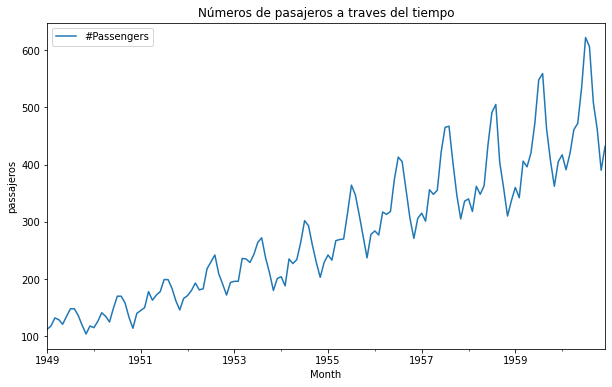

In [4]:
# Removemos NANs en el mismo dataframe
df.dropna(inplace=True)
# Graficamos nuestro valores
df.plot(figsize=(10,6), title="Números de pasajeros a traves del tiempo",
        ylabel="passajeros")
plt.show()

En esta primera gráfica podemos observar una tendencia a la alta, es decir, una relación lineal positiva, conforme aumentan los año vemos más pasajeros en los vuelos. Además de eso, podemos también observar subidas y bajadas que van incrementadose a lo largo de las fechas.

## Descomposición de la serie temporal
Ahora haremos una descoposición de nuestre serie en:
- Componente de tendencia
- Componente estacional
- Componente restante

### Modelo aditivo

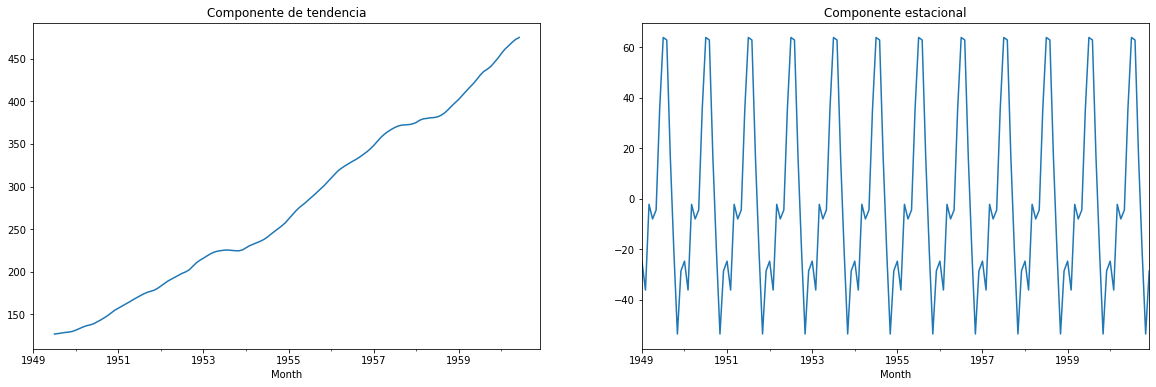

In [5]:
#Modelo aditivo
result = seasonal_decompose(df['#Passengers'],
                            model='Additive')

# Componente de tendencia
fig, axs = plt.subplots(1,2, figsize=(20,6))
result.trend.plot(title="Componente de tendencia", ax=axs[0])
# Componente estacional
result.seasonal.plot(title="Componente estacional", ax=axs[1])

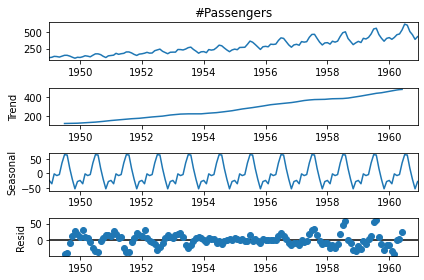

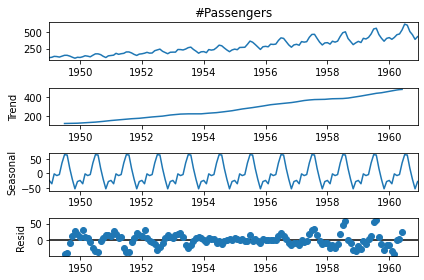

In [6]:
result.plot()

### Modelo multiplicativo

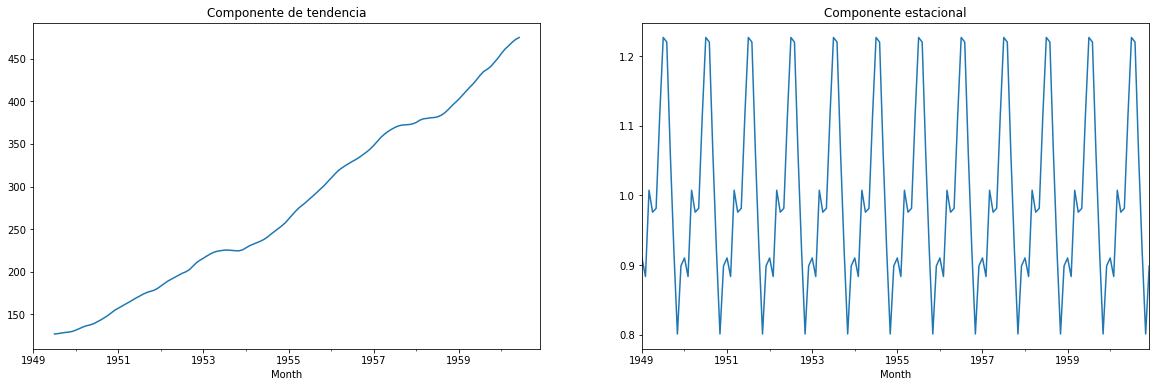

In [7]:
#Modelo aditivo
result = seasonal_decompose(df['#Passengers'],
                            model='multiplicative')

# Componente de tendencia
fig, axs = plt.subplots(1,2, figsize=(20,6))

result.trend.plot(title="Componente de tendencia", ax=axs[0])
# Componente estacional
result.seasonal.plot(title="Componente estacional", ax=axs[1])

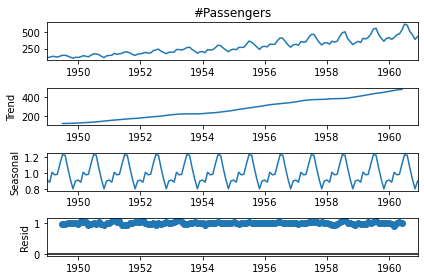

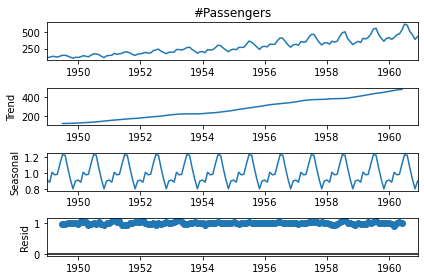

In [8]:
result.plot()

A partir de esta gráfico podemos observar la descomposición de nuestra serie temporal en tendencia, estacional y restante, mediante el uso del modelo aditivo y multiplicativo. Ya que en ambos modelos muestras las mismas descomposiciones mostramos sólo una gráfica. \\

La componente de estacionalidad exhibe una tendencia que se repite con respecto al tiempo, la dirección y la magnitud. En este caso representa el aumento en el número de pasajeros de aerolíneas durante las vacaciones cada año. \\

## Promedios moviles

In [9]:
# Metricas
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_predict):
    return np.mean(np.abs(y_true - y_predict  / y_true)) * 100

# Media movil
def moving_average(series, n):
    """Calcula la media móvil de una serie de tiempo
    Arguments:
    -----
    series -- np.array con los datos de la serie
    n -- el retraso (lag) de la ventana para calcular la media movil
    Returns
    ------:
    Un escalar con la media para la ventana indicada.
    """
    return np.average(series[-n:])

moving_average(df, 24)    

452.25

In [10]:
def plot_MA(series, window, plot_intervals=False, scale=1.96,
            plot_anormalies=False):
    """
    plot_intervals - para graficar el error
    plot_anormalies - nos ayuda a hacer zoom, ver la anomlias
    """
    rolling_mean = series.rolling(window=window).mean() # pandas
    plt.figure(figsize=(15,5), )    
    plt.plot(rolling_mean, 'g', label='Tendencia')
    
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        dev = np.std(series[window:]-rolling_mean[window:])
        upper_ =rolling_mean + (mae + scale*dev)
        lower_ =rolling_mean - (mae + scale*dev)
        plt.plot(upper_, 'r--', label='Límites superior/inferior')
        plt.plot(lower_, 'r--')
    if plot_anormalies:
        anomalies = pd.DataFrame(index=series.index, columns=series.columns)
        anomalies[series < lower_] = series[series < lower_]
        anomalies[series > upper_] = series[series > upper_]
        plt.plot(anomalies, 'ro', markersize=10)

    plt.plot(series[window:], label='Valores reales')    
    plt.legend(loc='upper left')    
    plt.grid(True)    

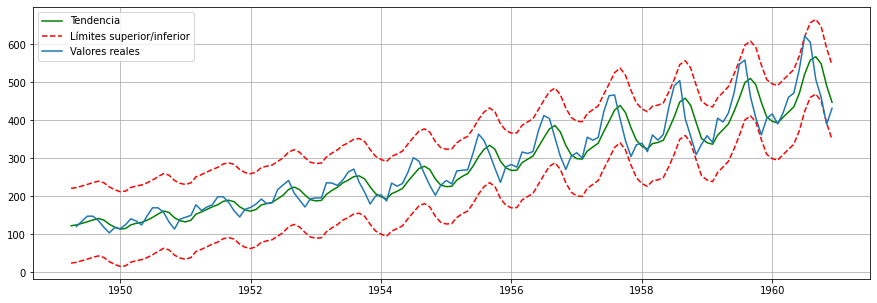

In [11]:
plot_MA(df, 4, plot_intervals=True)

Con esta gráfica representamos la media móvil con un tamaño de ventana 4, esto nos ayuda a representar la tendencia a partir de nuestro datos, de igual forma generamos un intervalo de error con las lineas puntuadas rojos.

In [12]:
!pip install pmdarima

### Modelo ARIMA

In [16]:
from pmdarima import auto_arima
  
import warnings
warnings.filterwarnings("ignore")
  
stepwise_fit = auto_arima(df['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',  
                          suppress_warnings = True, 
                          stepwise = True)          
  
stepwise_fit.summary() 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.39 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.58 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.50 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.80 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.67 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.01 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=1.12 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.69 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.33 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.41 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 13 May 2022   AIC                           1019.178
Time:                                     18:58:23   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Ajustando el modelo ARIMA en nuestro conjunto de datos

In [19]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]
  
from statsmodels.tsa.statespace.sarimax import SARIMAX
  
model = SARIMAX(train['#Passengers'], 
                order = (0, 1, 1), 
                seasonal_order =(2, 1, 1, 12))
  
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.013
Date:                            Fri, 13 May 2022   AIC                            896.026
Time:                                    19:01:05   BIC                            909.922
Sample:                                01-01-1949   HQIC                           901.669
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.076     -3.915      0.000      -0.448      -0.149
ar.S.L12       0.7100      0.212      3.345      0.001       0.294       1.126
ar.S.L24       0.2891      0.100      2.883      0.004       0.093       0.486
ma.S.L12      -0.9803      1.977     -0.496      0.620      -4.854       2.894
sigma2        88.3485    158.477      0.557      0.577    -222.261     398.958
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predicciones con el módelo ARIMA

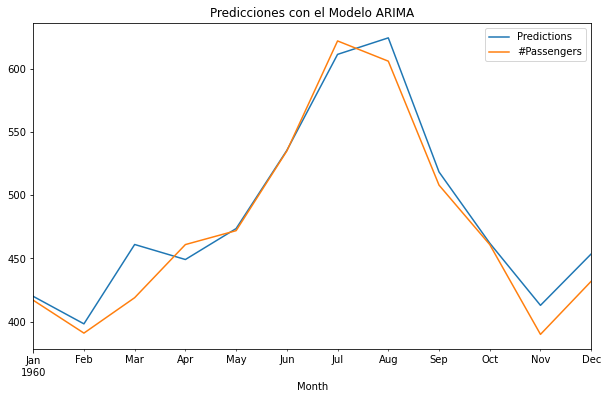

In [24]:
start = len(train)
end = len(train) + len(test) - 1
  
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
plt.figure(figsize=(10,6))
plt.title("Predicciones con el Modelo ARIMA")
predictions.plot(legend = True)
test['#Passengers'].plot(legend = True);

Podemos ver a partir de esta gráfica las prediciones hechas con el Modelo ARIMA, observamos que los valores de la predicciones están muy cerca de los valores reales que estan representados con la gráfica de color naranja. De febrero a Mayo hay un desviación muy grande con los valores reales, pero conforme van pasando los meses van mejorando de tal modo que de Mayo a Octubre vemos un error muy pequeño.